In [1]:
%pip install neattext seaborn pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# Load data
data = pd.read_csv("/workspaces/text_emotion/Dataset/tweet_emotions.csv")

In [8]:
# Initial data exploration
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [9]:
import neattext.functions as nfx

In [10]:
# Preprocess text data
data['Clean_Content'] = data['content'].apply(nfx.remove_userhandles)
data['Clean_Content'] = data['Clean_Content'].apply(nfx.remove_stopwords)

<Axes: xlabel='sentiment', ylabel='count'>

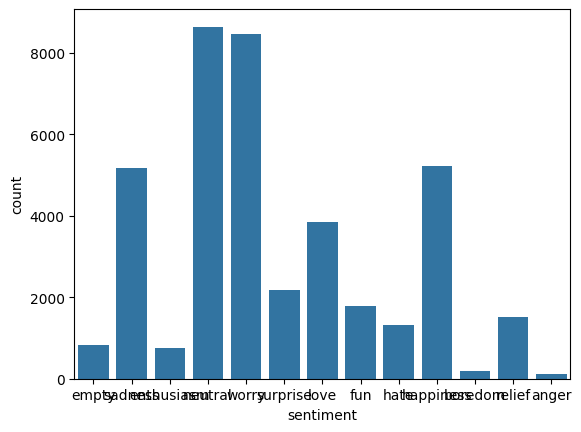

In [11]:
sns.countplot(x='sentiment', data=data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split data
x = data['Clean_Content']
y = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Training Model

In [ ]:
# Logistic Regression
pipe_lr = Pipeline([('cv', CountVectorizer()), ('lr', LogisticRegression())])
pipe_lr.fit(x_train, y_train)

In [ ]:
#Support vector machines
pipe_svm = Pipeline([('cv', CountVectorizer()), ('svc', SVC(kernel='rbf', C=10))])
pipe_svm.fit(x_train, y_train)

In [ ]:
#Randorm Forest Classifier
pipe_rf = Pipeline([('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train, y_train)

In [ ]:
import joblib

# Evaluate models and serialize the selected model
print(pipe_lr.score(x_test, y_test))
print(pipe_svm.score(x_test, y_test))
print(pipe_rf.score(x_test, y_test))

In [ ]:
joblib.dump(pipe_lr, "text_emotion.pkl")